In [ ]:
import pandas as pd
import re
import tqdm as tqdm
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ammu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ammu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data = pd.read_csv("A1_dataset.csv") 

In [ ]:
data.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...


# 1.A

### a. average number of sentences and tokens.

In [ ]:
def sent_tokens(data):
    one = 0
    zero = 0
    t_one = 0;
    t_zero = 0
    o = 0
    z = 0
    sent = []
    for i in data.index:
        sents = data.loc[i,'TEXT']
        sentences = re.split(r'[.?!]\s', sents)
        sent+=sentences
        tokens = re.split('[,\s]', sents)
        if(data.loc[i,'LABEL'] == 0): 
            zero = zero+1
            o+=len(sentences)
            t_one+=len(tokens)

        else:
            one+=1
            z+=len(sentences)
            t_zero+=len(tokens)
            
    print("Average number of sentences for class zero: ",z/zero)
    print("Average number of sentences for class one : ",o/one)
    print("Average number of tokens for class zero: ",t_zero/zero)
    print("Average number of tokens for class one : ",t_one/one)


In [ ]:
sent_tokens(data)

Average number of sentences for class zero:  2.3835
Average number of sentences for class one :  1.6982947092260603
Average number of tokens for class zero:  16.331
Average number of tokens for class one :  13.109750765194578


## b. total number of words starting with consonants and vowels.

In [ ]:
def words_constants(data):
    one = 0
    zero = 0
    v_one = 0
    c_one = 0
    v_zero = 0
    c_zero = 0


    for i in data.index:
        sents = data.loc[i,'TEXT']
        pattern_vowel = re.compile(r'\b[AEIOUaeiou]\w*\b')
        pattern_cons =  re.compile(r'\b[b-dB-Df-hF-Hj-nJ-Np-tP-Tv-zV-Z]\w*\b')
        vowels = re.findall(pattern_vowel,sents)
        cons = re.findall(pattern_cons,sents)
        if(data.loc[i,'LABEL'] == 0):
            zero = zero+1
            v_zero+=len(vowels)
            c_zero+=len(cons)
        else:
            one+=1
            v_one+=len(vowels)
            c_one+=len(cons)

    print("Total number of words starting with constants in class zero: ", c_zero)
    print("Total number of words starting with vowels in class zero: ", v_zero)
    print("Total number of words starting with consonents in class one: ", c_one)
    print("Total number of words starting with vowels in class one: ", v_one)

In [ ]:
words_constants(data)

Total number of words starting with constants in class zero:  20925
Total number of words starting with vowels in class zero:  6990
Total number of words starting with consonents in class one:  22782
Total number of words starting with vowels in class one:  7189


## c. lowercase the text and report the number of unique tokens present before and after lower casing.

In [ ]:
def lower_case(data):
    tokens_one_lower = set()
    tokens_zero_lower = set()
    tokens_one_normal = set()
    tokens_zero_normal = set()
    
    for i in data.index:
        sents = data.loc[i,'TEXT']
        if(data.loc[i,'LABEL']==0):
            tokens_zero_normal.update(set(re.split('[,\s]',sents)))
            data.loc[i,'TEXT'] = data.loc[i,'TEXT'].lower()
            tokens_zero_lower.update(set(re.split('[,\s]',data.loc[i,'TEXT'])))
        else:
            tokens_one_normal.update(set(re.split('[,\s]',sents)))
            data.loc[i,'TEXT'] = data.loc[i,'TEXT'].lower()
            tokens_one_lower.update(set(re.split('[,\s]',data.loc[i,'TEXT'])))
            
    
    print("The number of unique tokens before lower casing for class label 0: ",len(tokens_zero_normal))
    print("The number of unique tokens after lower casing for class label 0: ",len(tokens_zero_lower))
    print("The number of unique tokens before lower casing for class label 1: ",len(tokens_one_normal))
    print("The number of unique tokens after lower casing for class label 1: ",len(tokens_one_lower))

In [ ]:
lower_case(data)

The number of unique tokens before lower casing for class label 0:  7810
The number of unique tokens after lower casing for class label 0:  7101
The number of unique tokens before lower casing for class label 1:  9526
The number of unique tokens after lower casing for class label 1:  8590


## d. count and list all the usernames.

In [ ]:
def count_usernames(data):
    username_one = []
    usernaame_zero = []
    for i in data.index:
        sents = data.loc[i,'TEXT']
        if(data.loc[i,'LABEL']==1):
            username_one+=re.findall("^@[a-zA-Z0-9_]*",sents)
            
        else:
            usernaame_zero+=re.findall("^@[a-zA-Z0-9_]*",sents)
            
            
    print("List of user names for class one: ",list(username_one))
    print("Number of usernames in class one",len(username_one))
    print("List of user names for class zero: ",list(usernaame_zero))
    print("Number of usernames in class zero",len(usernaame_zero))
    
    
count_usernames(data)

List of user names for class one:  ['@awaisnaseer', '@marama', '@gfalcone601', '@mrstessyman', '@getmevideo', '@tb78', '@realdeal32', '@yoginifoodie', '@mileycyrus', '@sctunstall', '@ihauntwizards', '@soycamo', '@liverpool_tx', '@domkoenig', '@cyberela', '@spencerpratt', '@bossmobb', '@cmrush', '@nachojohnny', '@teambudd1', '@mrskutcher', '@eastcoastgamblr', '@nessie_111', '@nakulshenoy', '@jeddimkins', '@dannymcevoy', '@courtney_182', '@davidarchie', '@smithycurt', '@chuckiem', '@micheleknight', '@jacdo', '@dj_sportschick', '@hisfitness', '@amazingphil', '@wendym00n', '@nathalichristy', '@matthardybrand', '@maryjors', '@bedoggtde', '@mommo9000', '@supasash11', '@mayahzonfiya', '@egoodlett', '@rainbowsleeve', '@shaundiviney', '@stephenfry', '@zate', '@edlee', '@donniewahlberg', '@softandpoofyone', '@twishmay', '@therounddiet', '@romaineami', '@joenid', '@mahika', '@calvinharris', '@jazzyfizza', '@dsbabygirl', '@lamarlee', '@traceyfalk', '@shellrawlins', '@therealjordin', '@poetrysue', 

## e. count and list all the urls.

In [ ]:
def count_urls(data):
    urls_one = []
    urls_zero = []
    for i in data.index:
        sents = data.loc[i,'TEXT']
        if(data.loc[i,'LABEL'] == 1):
            urls_one+=re.findall(r'https?://\S+', sents)
            urls_one+=re.findall("www\.\S+",sents)
        else:
            urls_zero+=re.findall(r'https?://\S+', sents)
            urls_zero+=re.findall("www\.\S+",sents)
        
    print("list of urls for class one : ",list(urls_one))
    print("count of urls for class one ",len(urls_one))
    
        
    print("list of urls for class zero : ",list(urls_zero))
    print("count of urls for class zero ",len(urls_zero))
    
count_urls(data)

list of urls for class one :  ['http://blip.fm/~4lfcc', 'http://bit.ly/rwohr', 'http://su.pr/1rxupy', 'http://twitpic.com/6b03x', 'http://tinyurl.com/dk5p94)', 'http://leo.lobato.org/blipster/', 'http://bit.ly/nzzqv', 'http://bit.ly/etd3a', 'http://dontkillspike.proboards.com/', 'http://fuzz-ball.com/twitter', 'http://twendz.com', 'http://twitpic.com/66zex', 'http://twitpic.com/6fs89', 'http://www.myspace.com/xautomaticgirlx', 'www.myspace.com/xautomaticgirlx', 'www.musiqtone.com', 'http://plurk.com/p/z0xer', 'http://blip.fm/~4kokb', 'http://tinyurl.com/pboph6', 'http://is.gd/qaaz', 'www.paramore.net/shows', 'http://twitpic.com/680rp', 'http://tinyurl.com/mtq5u2', 'http://twitpic.com/6ddox', 'www.m2e.asia', 'http://ustre.am/2txz)', 'http://bit.ly/h6rnb', 'http://yfrog.com/0fvoqj', 'http://plurk.com/p/xfn8o', 'http://bnup2.com/p/569236', 'http://myloc.me/21sd', 'http://twitpic.com/6dty8', 'http://bit.ly/jsxm', 'http://tr.im/n0cy', 'http://tweet.sg', 'http://plurk.com/p/xt8cm', 'http://b

## f. count the number of tweets for each day of the week. Eg Mon: 58, Tues: 20,Wed...

In [ ]:
def per_week_tweet(data):
    day=[]
    c=0
    per_week = {'Mon':0,'Tue':0, 'Wed':0,'Thu':0,'Fri':0,'Sat':0,'Sun':0}
    for i in list(data['DATE_TIME']):
        x=str(i.split()[0])
        if(bool(re.match(r'Mon',x))):
            per_week['Mon']+=1
        elif(bool(re.match(r'Tue',x))):
            per_week['Tue']+=1
        elif(bool(re.match(r'Wed',x))):
            per_week['Wed']+=1
        elif(bool(re.match(r'Thu',x))):
            per_week['Thu']+=1
        elif(bool(re.match(r'Fri',x))):
            per_week['Fri']+=1
        elif(bool(re.match(r'Sat',x))):
            per_week['Sat']+=1
        elif(bool(re.match(r'Sun',x))):
            per_week['Sun']+=1
        
    return per_week


In [ ]:
print("The number of tweets for each day of the week for class one ")
print(per_week_tweet(data[data['LABEL']==1]))
print("The number of tweets for each day of the week for class zero ")
print(per_week_tweet(data[data['LABEL']==0]))

The number of tweets for each day of the week for class one 
{'Mon': 481, 'Tue': 132, 'Wed': 172, 'Thu': 50, 'Fri': 391, 'Sat': 298, 'Sun': 763}
The number of tweets for each day of the week for class zero 
{'Mon': 391, 'Tue': 154, 'Wed': 127, 'Thu': 171, 'Fri': 473, 'Sat': 119, 'Sun': 565}


 # 1.b

## a. total number of occurrences of the given word and sentences containing that word.

In [ ]:
def occurance_of_word(word,label):
    labeled_data = data[data['LABEL']==label]
#     n_words = labeled_data.TEXT.str.count(word).sum()
    n_words = 0
    for sent in labeled_data['TEXT']:
        n_words+=len(re.findall(f"{word}",sent))
        
    print("Total number of occurence of the given word :", n_words)
    
    sents = []
    for sent in labeled_data['TEXT']:
        sents+=sent.split('[?!.]\s')
        
    n_sent = 0
    for sent in sents:
        n = len(re.findall(f"{word}",sent))
        if(n>0):
            n_sent+=1
    
    
    print("Total number of occurence of sentences containing the given word: ", n_sent)

In [ ]:
#driver code
print("Enter the word you want to search")
word = input()
print("Enter the label")
label = int(input())
occurance_of_word(word,label)

Enter the word you want to search
minecart
Enter the label
0
Total number of occurence of the given word : 1
Total number of occurence of sentences containing the given word:  1


## b. number of sentences starting with the given word.

In [ ]:
def num_sent(word,label):
    labeled_data = data[data['LABEL']==label]
    sents = []
    for sent in labeled_data['TEXT']:
        sents+=sent.split('[?!.]\s')
        
    sentences = 0
    for sent in sents:
        check = bool(re.match(f"\A{word}\s",sent))
        if check==True:
            sentences+=1
            
    print("Number of sentences starting with the given word : ", sentences)

In [ ]:
#driver code
print("Enter the word you want to search")
word = input()
print("Enter the label")
label = int(input())
num_sent(word,label)

Enter the word you want to search
lol
Enter the label
0
Number of sentences starting with the given word :  1


# number of sentences ending  with given word 

In [ ]:
def num_sent_back(word,label):
    labeled_data = data[data['LABEL']==label]
        
    sentences = 0
    for sent in labeled_data['TEXT']:
        check = bool(re.findall(f"{word}\Z", sent))
        if check==True:
            sentences+=1
            
    print("Number of sentences ending with the given word : ", sentences)

In [ ]:
#driver code
print("Enter the word you want to search")
word = input()
print("Enter the label")
label = int(input())
num_sent_back(word,label)

Enter the word you want to search
montana
Enter the label
0
Number of sentences ending with the given word :  1


# pre processing section- 2 

In [ ]:
punctuations = string.punctuation
def remove_punct(sent):
    x="".join([letter for letter in sent if letter not in punctuations])
    return(x)

In [ ]:
def remove_white_spaces(sent):
    x = re.sub(r'\s+',' ',sent)#will remove extra spaces
    return(x)

In [ ]:
def tokenization(sent):
    tokens = word_tokenize(sent)
    return tokens

In [ ]:
def remove_stop_words(tokens):
    good_words = []
    for word in tokens:
        match = re.match('(?!no)\w{1,2}\\b',word+' ')
        x = bool(match)
        if x is not True :
            good_words.append(word)
    row = ' '.join(good_words)
    return row

In [ ]:
def remove_url_html(sent):
    pat = re.compile("@[a-zA-Z0-9_]+")#atleast one character should be present after @ and valid username contains alphabets,digits and _
    cl_pat = re.sub(pat, ' ', sent)
    pat = re.compile("www.\S+")
    cl_pat = re.sub(pat, ' ', cl_pat)
    pat = re.compile("<.*?>")#html
    cl_pat = re.sub(pat, ' ', cl_pat)
    pat = re.compile("https?://\S+")#url
    cl_pat = re.sub(pat, ' ', cl_pat)
    return str(cl_pat)

In [ ]:
def spelling_correction(sent):
    corr = TextBlob(sent)
    sent_corr = corr.correct()
    return str(sent_corr)

In [ ]:
def lemmatizing(row):
    lemmatizer = WordNetLemmatizer()
    lemm_words=[]
    for word in row.split(" "):

        lemm_words.append(lemmatizer.lemmatize(word))
    
    lemmed = ' '.join(lemm_words)
    return lemmed

In [ ]:
def preprocessing_pipeline(row):
    row = remove_url_html(row)
    row = remove_punct(row)
    row = remove_white_spaces(row)
    words = tokenization(row)
    row = remove_stop_words(words)
    row = spelling_correction(row)
    row = lemmatizing(row)
    return row

In [ ]:
def text_preprocessing_on_one_sentence(sentence):
    sentence = remove_url_html(sentence)
    print("after url-html removal :",sentence)
    sentence = remove_punct(sentence)
    print("after punctuation removal :",sentence)
    sentence = remove_white_spaces(sentence)
    print("after white space removal :",sentence)
    words = tokenization(sentence)
    print("after tokenization :",words)
    sentence = remove_stop_words(words)
    print("after stop words removal :",sentence)
    sentence = spelling_correction(sentence)
    print("after spelling  correction :",sentence)
    sentence = lemmatizing(sentence)
    print("after lemmatizing :",sentence)

In [ ]:
print(data.loc[322]) #sentence belonging to class 1

LABEL                                                        1
DATE_TIME                             Mon Jun 15 21:23:06 2009
TEXT         watch them cause till make smile comment rate ...
Name: 322, dtype: object


In [ ]:
sentence = data.loc[322,'TEXT']
print("Before preprocessing \n",sentence)
text_preprocessing_on_one_sentence(sentence)

Before preprocessing 
 watch them cause till make smile comment rate subscribe far
after url-html removal : watch them cause till make smile comment rate subscribe far
after punctuation removal : watch them cause till make smile comment rate subscribe far
after white space removal : watch them cause till make smile comment rate subscribe far
after tokenization : ['watch', 'them', 'cause', 'till', 'make', 'smile', 'comment', 'rate', 'subscribe', 'far']
after stop words removal : watch them cause till make smile comment rate subscribe far
after spelling  correction : watch them cause till make smile comment rate subscribe far
after lemmatizing : watch them cause till make smile comment rate subscribe far


In [ ]:
print(data.loc[865]) #sentence belonging to class 0

LABEL                                                        0
DATE_TIME                             Mon Jun 15 16:30:52 2009
TEXT         @mamasaywhat bitch!!  lol...j/k...mines almost...
Name: 865, dtype: object


In [ ]:
sentence = data.loc[865,'TEXT']
print("Before preprocessing \n",sentence)
text_preprocessing_on_one_sentence(sentence)

Before preprocessing 
 @mamasaywhat bitch!!  lol...j/k...mines almost done too...then 1 1/2 - 2 hour work out 
after url-html removal :   bitch!!  lol...j/k...mines almost done too...then 1 1/2 - 2 hour work out 
after punctuation removal :   bitch  loljkmines almost done toothen 1 12  2 hour work out 
after white space removal :  bitch loljkmines almost done toothen 1 12 2 hour work out 
after tokenization : ['bitch', 'loljkmines', 'almost', 'done', 'toothen', '1', '12', '2', 'hour', 'work', 'out']
after stop words removal : bitch loljkmines almost done toothen hour work out
after spelling  correction : bitch loljkmines almost done toothed hour work out
after lemmatizing : bitch loljkmines almost done toothed hour work out


In [ ]:
for i in tqdm.tqdm(data.index):
    data.loc[i,'TEXT'] = preprocessing_pipeline(data.loc[i,'TEXT'])

100%|██████████████████████████████████████████████████████████████████████████████| 4287/4287 [13:10<00:00,  5.42it/s]


# section 3 word cloud 

In [ ]:
text_pos = " ".join(data.loc[i,'TEXT'] for i in data.index if data.loc[i,'LABEL']==1)
text_neg = " ".join(data.loc[i,'TEXT'] for i in data.index if data.loc[i,'LABEL']==0)


In [ ]:
word_cloud = WordCloud().generate(text_pos)

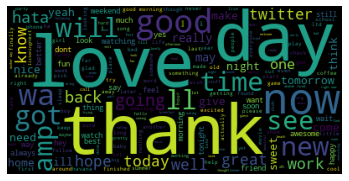

In [ ]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

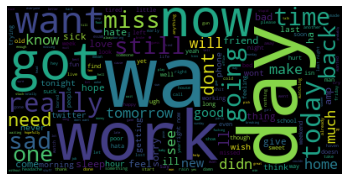

In [ ]:
word_cloud = WordCloud().generate(text_neg)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# section  4 sentiment analysis 

In [ ]:
sid = SentimentIntensityAnalyzer()
data['predicted'] = [0 if(i<0) else 1 for i in list(data.TEXT.apply(lambda x : sid.polarity_scores(x)['compound']))]

In [ ]:
def find_accuracy(data,pred,actual):
    correct = 0
    for i in data.index:
        if(data.loc[i,pred] == data.loc[i,actual]):
            correct = correct+1
    
    return correct/data.shape[0]

In [ ]:
find_accuracy(data,'predicted','LABEL')

0.6664334033123396

In [ ]:
raw_data = pd.read_csv("A1_dataset.csv") 
sid = SentimentIntensityAnalyzer()
raw_data['predicted'] = [0 if(i<0) else 1 for i in list(raw_data.TEXT.apply(lambda x : sid.polarity_scores(x)['compound']))]

In [ ]:
find_accuracy(raw_data,'predicted','LABEL')

0.6834616281782132